In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot


In [3]:
df = pd.read_csv(r"C:\Users\CHARAN\Downloads\wine.csv")

In [4]:
df 

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
len(list(df))

14

In [7]:
X = df.drop('Type',axis=1)
Y = df["Type"]

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_components=pca.fit_transform(df)


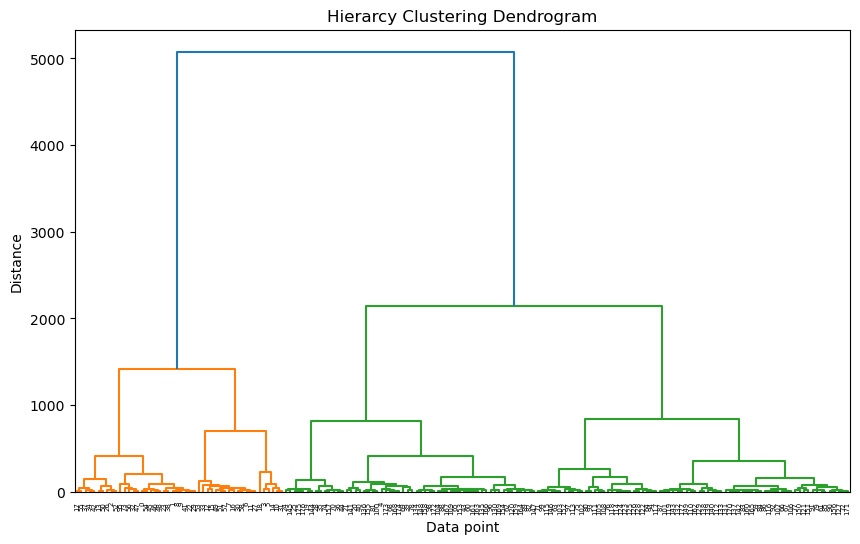

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_metrix = linkage(principal_components,method= "ward")
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
dendrogram(linkage_metrix)
plt.title("Hierarcy Clustering Dendrogram")
plt.xlabel("Data point")
plt.ylabel("Distance")
plt.show()

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia=[]
#Initialize the list silhouette_scores
silhouettte_scores = []
for k in range(2,13):
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

C:\Users\CHARAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\CHARAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CHARAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\CHARAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

In [30]:
from sklearn.metrics import silhouette_score

# Initialize the list silhouette_scores
silhouette_scores = []

# Your code...

# Append silhouette score to silhouette_scores list
silhouette_scores.append(S(principal_components, kmeans.labels_))


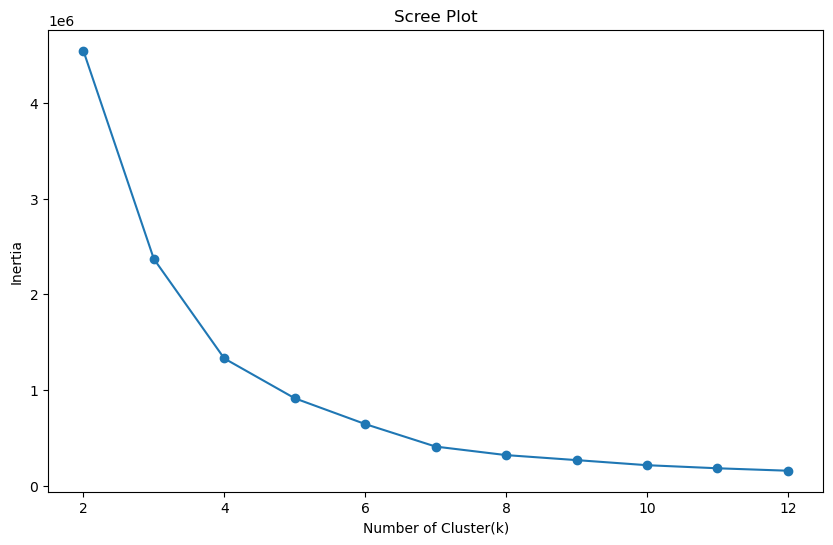

In [39]:
#Scree plot
plt.figure(figsize=(10,6))
plt.plot(range(2,13), inertia, marker='o')
plt.title("Scree Plot")
plt.xlabel('Number of Cluster(k)')
plt.ylabel('Inertia')
plt.show()



In [41]:
optimal_k =np.argmax(silhouette_scores)+2
print("Optium number of clusters:",optimal_k)

Optium number of clusters: 2


In [45]:
original_clusters =df['Type'].nunique()
print("Original  number of clusters:", original_clusters)

Original  number of clusters: 3
